### 개의 품종 분류
- 딥러닝 팀 프로젝트
- 데이터 출처 : https://www.kaggle.com/datasets/amandam1/120-dog-breeds-breed-classification

1) 모듈 준비, 데이터 준비
2) 이미지 파일 픽셀값 전처리 (흑백으로 변환) -> 크기가 많이 클 경우, DataFrame으로 저장 후 csv 파일로 저장
3) 데이터 전처리 - 피쳐 / 타겟 분리, 정규화
4) 학습 데이터셋 준비
    1. 사용자 정의 데이터셋 및 전체 데이터셋 준비
    2. 학습용, 검증용, 테스트용 데이터셋 준비
5) 데이터 로더 생성 (학습용, 검증용, 테스트용)
6) 모델 클래스 정의
7) 함수 정의 (학습, 검증, 테스트)
8) 학습, 학습 후 평가 (평가척도)
9) 테스트
10) 학습 스케줄러
11) 모델 저장 (불러와서 실행할 수 있게 하기 위해)

In [1]:
import os, sys
from rembg import remove
from PIL import Image
Image.ANTIALIAS = Image.LANCZOS

In [2]:
print(os.getcwd())

C:\Users\kdp\PycharmProjects\KDT_08_Deep_Learning\WORK_DL\WORK_TEAM_PROJECT


In [7]:
input = Image.open('./beagle1.jpg')
input = input.convert('RGBA')
output = remove(input)
output.save('./beagle-rembg.png')       # 'RGBA' 모드의 이미지는 'jpg'로 저장할 수 없다.

In [16]:
def resize_and_crop(img_path, modified_path, size, crop_type='middle'):
    files = os.listdir(img_path)    # 파일명 리스트 (list)
    
    if not os.path.exists(modified_path):
        os.makedirs(modified_path)  # resize 이미지가 저장될 폴더가 없을 경우 생성
    
    for file in files:
        # name = str(file)
        # os.chdir(img_path)
        img = Image.open(img_path + '/' + file)           # <class 'PIL.JpegImagePlugin.JpegImageFile'>
        img = img.convert('RGBA')
        img = remove(img)
        img_ratio = img.size[0] / float(img.size[1])    # 해당 이미지 비율
        ratio = size[0] / float(size[1])                # 목표 이미지 비율
        
        if ratio > img_ratio:
            img = img.resize((size[0], int(round(size[0] * img.size[1] / img.size[0]))),   
                             Image.ANTIALIAS)
            if crop_type == 'middle':
                box = (0, int(round((img.size[1] - size[1]) / 2)), 
                       img.size[0], int(round((img.size[1] + size[1]) / 2)))
            img = img.crop(box)
        elif ratio < img_ratio:
            img = img.resize((int(round(size[1] * img.size[0] / img.size[1])), size[1]),
                             Image.ANTIALIAS)
            if crop_type == 'middle':
                box = (int(round((img.size[0] - size[0]) / 2)), 0, 
                       int(round((img.size[0] + size[0]) / 2)), img.size[1])
            img = img.crop(box)
        else:
            img = img.resize((size[0], size[1]), Image.ANTIALIAS)
        
        # os.chdir(modified_path)
        img.save(modified_path + '/' + file.replace('jpg', 'png'))

In [11]:
'beagle.jpg'.replace('jpg', 'png')

'beagle.png'

In [10]:
files = os.listdir('./dog-breeds/beagle')
for file in files:
    print(file)

beagle1.jpg
beagle10.jpg
beagle101.jpg
beagle105.jpg
beagle106.jpg
beagle108.jpg
beagle109.jpg
beagle11.jpg
beagle110.jpg
beagle112.jpg
beagle114.jpg
beagle115.jpg
beagle116.jpg
beagle118.jpg
beagle12.jpg
beagle13.jpg
beagle14.jpg
beagle15.jpg
beagle16.jpg
beagle17.jpg
beagle18.jpg
beagle2.jpg
beagle20.jpg
beagle22.jpg
beagle24.jpg
beagle26.jpg
beagle28.jpg
beagle30.jpg
beagle32.jpg
beagle34.jpg
beagle36.jpg
beagle38.jpg
beagle4.jpg
beagle40.jpg
beagle42.jpg
beagle44.jpg
beagle46.jpg
beagle48.jpg
beagle5.jpg
beagle50.jpg
beagle52.jpg
beagle54.jpg
beagle56.jpg
beagle58.jpg
beagle60.jpg
beagle61.jpg
beagle62.jpg
beagle63.jpg
beagle64.jpg
beagle65.jpg
beagle66.jpg
beagle67.jpg
beagle68.jpg
beagle69.jpg
beagle7.jpg
beagle70.jpg
beagle71.jpg
beagle72.jpg
beagle73.jpg
beagle74.jpg
beagle75.jpg
beagle76.jpg
beagle77.jpg
beagle78.jpg
beagle79.jpg
beagle8.jpg
beagle83.jpg
beagle84.jpg
beagle85.jpg
beagle86.jpg
beagle87.jpg
beagle88.jpg
beagle89.jpg
beagle90.jpg
beagle91.jpg
beagle92.jpg
beagle9

In [13]:
def print_files(img_path, modified_path):
    files = os.listdir(img_path)    # 파일명 리스트 (list)
    
    if not os.path.exists(modified_path):
        os.makedirs(modified_path)  # resize 이미지가 저장될 폴더가 없을 경우 생성
    
    for file in files:
        print(img_path + '/' + file)

In [17]:
# 시간 없어서 다 못 돌림
size = 64, 64
path2 = "./Images"
modified_path2 = "./Images-resized"
for folder in os.listdir(path2):
    # print(path2 + folder)
    resize_and_crop(path2 + '/' + folder, modified_path2 + '/' + folder, size)

KeyboardInterrupt: 

In [4]:
# size = 128, 128 # 바꾸고 싶은 사이즈
# path = "./dog-breeds/rottweiler/"  # 이미지 경로
# modified_path = "./dog-breeds-resized/rottweiler/"    # resize된 이미지가 저장될 경로
# resize_and_crop(path, modified_path, size)

In [40]:
# resize 예제
# test_img = Image.open('./dog-breeds/beagle/beagle1.jpg')
# resized_img = test_img.resize((128, 128), Image.LANCZOS)
# resized_img.save('output_image.jpg')

In [18]:
import torch
import torchvision.transforms.functional as TF
import numpy as np
import pandas as pd

def convert_to_grayscale_tensor(image_path):
    """ 컬러 이미지를 그레이스케일로 변환 후, 텐서로 저장하는 함수 """
    
    # Pillow로 컬러이미지 읽어오기
    color_image = Image.open(image_path)
    
    # 이미지를 grayscale로 변환
    grayscale_image = color_image.convert('L')
    
    # 이미지를 PyTorch 텐서로 변환 (+ 0~1 범위로 정규화)
    image_tensor = TF.to_tensor(grayscale_image)
    print(type(image_tensor), image_tensor.shape)


def convert_to_grayscale_array(image_path):
    """ 컬러 이미지를 그레이스케일로 변환 후, 1차원 리스트로 저장하는 함수 """
    
    # Pillow로 컬러이미지 읽어오기
    color_image = Image.open(image_path)
    
    # 이미지를 grayscale로 변환
    grayscale_image = color_image.convert('L')
    
    # 이미지 -> ndarray -> list
    image_array = np.array(grayscale_image)
    image_array =  image_array.reshape(-1)
    image_list = image_array.tolist()
    # print(type(image_list), len(image_list))
    
    return image_list   # 1차원 리스트 반환


def save_tensor_as_image(tensor, file_path):
    """ 텐서를 이미지 파일로 저장하는 함수 """
    
    # 텐서를 이미지로 변환
    image = TF.to_pil_image(tensor)
    
    # 이미지 파일로 저장
    image.save(file_path)

C:\Users\kdp\.conda\envs\Torch_38\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 지정된 프로시저를 찾을 수 없습니다'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [30]:
convert_to_grayscale_tensor('./beagle1.jpg')

<class 'torch.Tensor'> torch.Size([1, 128, 128])


In [31]:
type(convert_to_grayscale_array('./beagle1.jpg'))

list

In [147]:
color_image = Image.open('./blenheim.png')
grayscale_image = color_image.convert('L')
grayscale_image.save('./blenheim-gray.png')

In [32]:
# 컬러이미지 -> 흑백이미지 -> 저장 (예시)
color_image = Image.open('./beagle1.jpg')
grayscale_image = color_image.convert('L')
grayscale_image.save('./beagle-gray.jpg')

In [33]:
image = Image.open('./beagle-gray.jpg')
image = TF.to_tensor(image)
print(image.squeeze())

tensor([[0.4118, 0.4118, 0.4157,  ..., 0.3569, 0.3529, 0.3490],
        [0.4118, 0.4118, 0.4157,  ..., 0.3686, 0.3608, 0.3569],
        [0.4118, 0.4157, 0.4157,  ..., 0.3843, 0.3725, 0.3647],
        ...,
        [0.7216, 0.7137, 0.7216,  ..., 0.7490, 0.7725, 0.7843],
        [0.7412, 0.7333, 0.7373,  ..., 0.7569, 0.7608, 0.7569],
        [0.7373, 0.7294, 0.7333,  ..., 0.7451, 0.7294, 0.7098]])


In [19]:
### 컬러이미지 -> 흑백이미지 -> 저장 (전체 데이터)
pixel_list = []   # 모든 이미지 파일들의 픽셀값을 담을 리스트
target_list = []    # 각 이미지 파일들의 타겟값을 담을 리스트 (개 품종)

# path2 = './dog-breeds-resized'
path2 = './Images-resized'
for f in os.listdir(path2):
    sep_idx = f.find('-')
    dog_breed = f[sep_idx+1:]
    print(f'[ {dog_breed} ]')
    cnt = 0
    for ff in os.listdir(path2 + '/' + f):
        filename = path2 + '/' + f + '/' + ff
        pixel_list.extend(convert_to_grayscale_array(filename))
        # dog_image = Image.open(filename)
        # dog_image = TF.to_tensor(dog_image)
        # print(dog_image.squeeze().shape)
        cnt += 1
    target_list.extend([dog_breed for i in range(cnt)])

[ Chihuahua ]
[ Japanese_spaniel ]
[ Maltese_dog ]
[ Pekinese ]
[ Shih-Tzu ]
[ Blenheim_spaniel ]
[ papillon ]
[ toy_terrier ]
[ Rhodesian_ridgeback ]
[ Afghan_hound ]
[ basset ]
[ beagle ]
[ bloodhound ]
[ bluetick ]


In [20]:
len(pixel_list), len(target_list)

(10711040, 2615)

In [21]:
dog_image_array = np.array(pixel_list)
dog_image_array = dog_image_array.reshape(-1, size[0] * size[1])

In [22]:
dog_image_array.shape      # 사진 13680장, 각각 (64 * 64 픽셀)

(2615, 4096)

In [26]:
dog_image_array[33, :10]

array([  0,   0,   0,   0,   0,   0,   0,  38, 127,   0])

In [27]:
dog_image_array = dog_image_array / 255.    # 0~1 범위로 정규화

In [28]:
dog_image_array[33, :10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.14901961, 0.49803922, 0.        ])

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# 문자열 리스트를 숫자로 변환
encoded_list = label_encoder.fit_transform(target_list)
dog_breed_array = np.array(encoded_list)
dog_breed_array = dog_breed_array

In [30]:
dog_breed_array.shape   # 1D (CrossEntropyLoss 함수 때문에)

(2615,)

In [31]:
dog_breed_array.dtype

dtype('int64')

In [32]:
label_encoder.classes_  # 각 숫자가 의미하는 것 (품종)

array(['Afghan_hound', 'Blenheim_spaniel', 'Chihuahua',
       'Japanese_spaniel', 'Maltese_dog', 'Pekinese',
       'Rhodesian_ridgeback', 'Shih-Tzu', 'basset', 'beagle',
       'bloodhound', 'bluetick', 'papillon', 'toy_terrier'], dtype='<U19')

(4-1) 데이터셋(Dataset) 생성

In [33]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset

In [34]:
## 사용자 정의 Dataset 클래스
class DogDataset(Dataset):
    
    def __init__(self, x_data, y_data):
        super().__init__()
        
        # x, y 데이터가 DF라면 ndarray로 바꾸고, ndarray라면 그대로 저장
        x_data = x_data.values if isinstance(x_data, pd.DataFrame) else x_data
        y_data = y_data.values if isinstance(y_data, pd.DataFrame) else y_data
        
        # ndarray -> tensor
        self.feature = torch.FloatTensor(x_data)    # Float
        self.target = torch.LongTensor(y_data)      # Long
    
    # 데이터셋의 개수 체크 콜백함수
    def __len__(self):
        return self.target.shape[0]
    
    # 특정 인덱스 데이터 + 라벨 반환 콜백함수
    def __getitem__(self, index):
        return self.feature[index], self.target[index]

In [35]:
# 데이터셋 생성
dog_dataset = DogDataset(dog_image_array, dog_breed_array)

In [36]:
dog_dataset[0], dog_image_array[0], dog_breed_array[0]

((tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(2)),
 array([0., 0., 0., ..., 0., 0., 0.]),
 2)

In [37]:
import time
for i in range(10):
    print(dog_dataset[i])
    time.sleep(1)

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(2))
(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(2))
(tensor([0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0941]), tensor(2))
(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(2))
(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(2))
(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(2))
(tensor([0.0000, 0.0000, 0.0000,  ..., 0.3490, 0.0000, 0.0000]), tensor(2))
(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(2))
(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(2))
(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(2))


(4-2) 학습용, 검증용, 테스트용 데이터셋 분리

In [38]:
### 파이토치판 train_test_split
from torch.utils.data import random_split

# 학습용, 검증용, 테스트 데이터 비율
trainDS, validDS, testDS = random_split(dog_dataset, [0.7, 0.1, 0.2], generator=torch.Generator().manual_seed(24))

In [39]:
type(trainDS)

torch.utils.data.dataset.Subset

In [40]:
len(trainDS), len(validDS), len(testDS)     # 각각 들어있는 데이터 수

(1831, 261, 523)

(5) 데이터 로더 생성 (학습용, 검증용, 테스트용)

In [93]:
### DataLoader 생성
BATCH_SIZE = 150
TRAIN_DL = DataLoader(trainDS, batch_size=BATCH_SIZE, drop_last=True, shuffle=True)
VALID_DL = DataLoader(validDS, batch_size=BATCH_SIZE, shuffle=True)
TEST_DL = DataLoader(testDS, batch_size=BATCH_SIZE)

len(TRAIN_DL), len(VALID_DL), len(TEST_DL) # Epoch 당 반복 단위

(12, 2, 4)

In [94]:
for _, (feature, target) in enumerate(TRAIN_DL):
    print(f'[{_}] feature {feature.shape} target {target.shape}')

[0] feature torch.Size([150, 4096]) target torch.Size([150])
[1] feature torch.Size([150, 4096]) target torch.Size([150])
[2] feature torch.Size([150, 4096]) target torch.Size([150])
[3] feature torch.Size([150, 4096]) target torch.Size([150])
[4] feature torch.Size([150, 4096]) target torch.Size([150])
[5] feature torch.Size([150, 4096]) target torch.Size([150])
[6] feature torch.Size([150, 4096]) target torch.Size([150])
[7] feature torch.Size([150, 4096]) target torch.Size([150])
[8] feature torch.Size([150, 4096]) target torch.Size([150])
[9] feature torch.Size([150, 4096]) target torch.Size([150])
[10] feature torch.Size([150, 4096]) target torch.Size([150])
[11] feature torch.Size([150, 4096]) target torch.Size([150])


(6) 모델 클래스 정의

In [95]:
import torch.nn as nn
import torch.optim as optim

In [125]:
### 모델 클래스 정의
class DogBreedModel1(nn.Module):
    # 구성요소 정의 함수
    def __init__(self, in_, out_):
        super().__init__()  # 부모 클래스 생성자
        self.layer1 = nn.Linear(in_, 4000)
        self.layer2 = nn.Linear(4000, 3000)
        self.layer3 = nn.Linear(3000, 2000)
        self.layer4 = nn.Linear(2000, 1000)
        self.layer5 = nn.Linear(1000, 500)
        self.layer6 = nn.Linear(500, 100)
        self.layer7 = nn.Linear(100, out_)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.relu(x)
        x = self.layer4(x)
        x = self.relu(x)
        x = self.layer5(x)
        x = self.relu(x)
        x = self.layer6(x)
        x = self.relu(x)
        x = self.layer7(x)
        return x

In [97]:
class DogBreedModel2(nn.Module):
    def __init__(self, in_, out_):
        super().__init__()
        self.layer1 = nn.Linear(in_, 3000)
        self.layer2 = nn.Linear(3000, 3000)
        self.layer3 = nn.Linear(3000, 1000)
        self.layer4 = nn.Linear(1000, 1000)
        self.layer5 = nn.Linear(1000, out_)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.relu(x)
        x = self.layer4(x)
        x = self.relu(x)
        x = self.layer5(x)
        return x

In [135]:
class DogBreedModel3(nn.Module):
    def __init__(self, in_, out_, hidden_sizes):
        super().__init__()
        self.input_size = in_
        self.hidden_sizes = hidden_sizes
        self.output_size = out_
        
        self.layers = nn.ModuleList()
        
        self.layers.append(nn.Linear(in_, hidden_sizes[0]))
        for i in range(len(hidden_sizes)-1):
            self.layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        self.layers.append(nn.Linear(hidden_sizes[-1], out_))
    
    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        return x

In [98]:
model_dir = "./model"
model_name = model_dir + '/best_model3.pth'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)   # model 폴더 없을 시 생성

In [137]:
# 실행 디바이스
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# 입출력 피쳐
IN_DIM, OUT_DIM = dog_image_array.shape[1], np.unique(dog_breed_array).size

# 모델 인스턴스
# MODEL = DogBreedModel1(IN_DIM, OUT_DIM)
MODEL = DogBreedModel3(IN_DIM, OUT_DIM, [4000, 3500, 3000, 2500, 2000, 
                                         1500, 1000, 750, 500, 250, 
                                         100, 75, 50, 25])

# 최적화 인스턴스 생성
OPTIMIZER = optim.SGD(MODEL.parameters())   # w, b 넘겨줌

# 손실 함수
LOSS_FN = nn.CrossEntropyLoss().to(DEVICE)

# 학습 횟수 설정
EPOCHS = 10

# 분류 개수
CLASSES = len(label_encoder.classes_)   # OUT_DIM

In [138]:
IN_DIM, OUT_DIM

(4096, 14)

In [139]:
for para in MODEL.named_parameters():
    print(para)

('layers.0.weight', Parameter containing:
tensor([[ 0.0134,  0.0143, -0.0130,  ...,  0.0022,  0.0039, -0.0002],
        [-0.0056,  0.0129,  0.0109,  ..., -0.0100,  0.0060,  0.0050],
        [-0.0037,  0.0102,  0.0094,  ...,  0.0154,  0.0044, -0.0023],
        ...,
        [-0.0087,  0.0076, -0.0149,  ...,  0.0022,  0.0033, -0.0021],
        [ 0.0014,  0.0053,  0.0072,  ..., -0.0020,  0.0052, -0.0143],
        [ 0.0046,  0.0091, -0.0123,  ..., -0.0083,  0.0035, -0.0138]],
       requires_grad=True))
('layers.0.bias', Parameter containing:
tensor([ 0.0125, -0.0066, -0.0140,  ...,  0.0071,  0.0019,  0.0054],
       requires_grad=True))
('layers.1.weight', Parameter containing:
tensor([[-1.4306e-02, -1.8788e-03, -1.4407e-02,  ..., -9.0109e-03,
          1.2789e-02,  1.3775e-02],
        [-5.2157e-03, -1.7219e-03, -1.2602e-02,  ..., -1.2115e-02,
          7.7815e-03, -1.4352e-02],
        [ 8.1945e-03, -6.8284e-03, -1.4576e-02,  ..., -7.4218e-03,
         -1.0133e-02,  7.6335e-03],
        

(7) 함수 정의 (학습, 검증, 테스트)

In [115]:
 print(f'model => {id(MODEL)}')

model => 2305169327920


In [116]:
import torchmetrics.functional as metrics

In [140]:
### 학습 진행함수
def training(device, epoch, model, dataLoader, optimizer, loss_fn, classes):
    print(f'model => {id(model)}')
    # 학습모드
    model.train()

    # 배치크기만큼 학습진행 및 저장
    train_report = [[], [], []] # loss, acc, f1
    for idx, (feature, target) in enumerate(dataLoader):
        # 배치크기만큼의 학습 데이터 준비
        # 입력된 device로 이동한 텐서 반환(복사본)
        feature, target = feature.to(device), target.to(device)

        # 배치크기만큼 학습
        pre_target = model(feature)
        # print(pre_target)

        # 손실계산
        loss = loss_fn(pre_target, target)
        train_report[0].append(loss)

        # 성능 평가
        acc = metrics.accuracy(pre_target, target, task='multiclass', num_classes=classes)
        train_report[1].append(acc)
        # print(pre_target.argmax(dim=1)[:10], target[:10], sep='\n')
        
        # f1-score
        f1 = metrics.f1_score(pre_target, target, task='multiclass', num_classes=classes)
        train_report[2].append(f1)

        # W, b 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not idx % 50: print('.', end='')

    # 에포크 단위 학습 진행 메시지 출력
    # 에포크 단위 학습 진행 메시지 출력
    loss_score = (sum(train_report[0])/BATCH_SIZE).item()
    acc_score = (sum(train_report[1])/BATCH_SIZE).item()
    f1_score = (sum(train_report[2])/BATCH_SIZE).item()
    print(f'\n[{epoch+1} Train ] Loss ==> {loss_score:.3f} Acc ==> {acc_score:.3f} F1 ==> {f1_score:.3f}')
    
    return loss_score, acc_score, f1_score

In [141]:
training(DEVICE, 10, MODEL, TRAIN_DL, OPTIMIZER, LOSS_FN, CLASSES)    

model => 2305179253632
.
[11 Train ] Loss ==> 0.211 Acc ==> 0.006 F1 ==> 0.006


(0.2113392949104309, 0.005777777638286352, 0.005777777638286352)

In [142]:
### 검증 및 테스트 진행함수
def testing(device, epoch, model, dataLoader, loss_fn, classes, kind='valid'):
    # 테스트 모드
    model.eval()
    
    with torch.no_grad():
        # 배치크기 만큼의 테스트 데이터 준비
        test_report = [[], [], []]
        for idx, (feature, target) in enumerate(dataLoader):
            # 배치크기만큼의 테스트 데이터 준비
            feature, target = feature.to(device), target.to(device)
            
            # 학습
            pre_target = model(feature)
            # print('pre_target.shape',pre_target.shape)
            # print('target', target.shape)
            # print(pre_target)
            print(pre_target.argmax(dim=1))
            
            # 손실계산
            loss = loss_fn(pre_target, target)
            test_report[0].append(loss)
            
            # 성능 평가
            acc = metrics.accuracy(pre_target, target, task='multiclass', num_classes=classes)
            test_report[1].append(acc)
            
            #f1-score
            f1 = metrics.f1_score(pre_target, target, task='multiclass', num_classes=classes)
            test_report[2].append(f1)
    
    testing_type = 'Valid' if kind == 'valid' else 'Test'
    
    # 에포크 단위 학습 진행 메시지 출력
    loss_score = (sum(test_report[0])/BATCH_SIZE).item()
    acc_score = (sum(test_report[1])/BATCH_SIZE).item()
    f1_score = (sum(test_report[2])/BATCH_SIZE).item() 
    print(f'[{epoch+1} {testing_type} ] Loss ==> {loss_score:.3f} Acc ==> {acc_score:.3f} F1 ==> {f1_score:.3f}\n')
    
    return loss_score, acc_score, f1_score

In [143]:
testing(DEVICE, 10, MODEL, VALID_DL, LOSS_FN, OUT_DIM)

tensor([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12])
tensor([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       

(0.03517653048038483, 0.0014498498057946563, 0.0014498498057946563)

(8) 학습 진행, 학습 성능평가

In [144]:
# 학습 및 검증 데이터별 성능지표값
train_ = {'loss':[], 'acc':[], 'f1':[]}
val_ = {'loss':[], 'acc':[], 'f1':[]}

# 모델 저장 기준 변수
pred_va_score = 100

# 학습 진행
for epo in range(EPOCHS):
    print(f'[Epoch {epo+1}/{EPOCHS}]', end=' ')
    tr_score = training(DEVICE, epo, MODEL, TRAIN_DL, OPTIMIZER, LOSS_FN, OUT_DIM)
    va_score = testing(DEVICE, epo, MODEL, VALID_DL, LOSS_FN, OUT_DIM)
    
    # 검증 데이터 기준 학습된 모델 저장 => Loss가 이전보다 작을 경우 저장 / Acc 또는 F1이면 이전보다 큰 경우 저장
    if pred_va_score > va_score[0]:
        torch.save(MODEL, model_name)
        pred_va_score = va_score[0]
        print('SAVED\n')
    
    for idx, key in enumerate(train_):
        train_[key].append(tr_score[idx])
        val_[key].append(va_score[idx])

print('Done!')

[Epoch 1/10] model => 2305179253632
.
[1 Train ] Loss ==> 0.211 Acc ==> 0.006 F1 ==> 0.006
tensor([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12])
tensor([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 

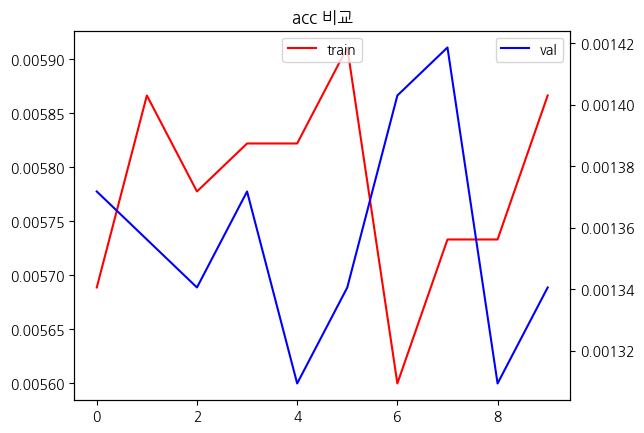

In [146]:
### Loss와 Acc F1 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

metric = 'acc'
fig, ax1 = plt.subplots()
ax1.plot(train_[metric], label='train', color='red')

ax2 = ax1.twinx()
ax2.plot(val_[metric], label='val', color='blue')

# ax3 = ax1.twinx()
# ax3.plot(train_['f1'], label='f1', color='orange')
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
plt.title(f'{metric} 비교')

plt.show()